# 1.数据的读取与数据类型

In [1]:
import pandas as pd
train_df=pd.read_csv('../data/比赛训练集.csv',encoding='gbk')
test_df=pd.read_csv('../data/糖尿病遗传风险预测挑战赛b榜新数据集.csv',encoding='utf-8')

print('训练集的数据大小：',train_df.shape)
print('测试集的数据大小：',test_df.shape)
print('-'*30)
print('训练集的数据类型：')
print(train_df.dtypes)
print('-'*30)
print(test_df.dtypes)

训练集的数据大小： (5070, 10)
测试集的数据大小： (4000, 9)
------------------------------
训练集的数据类型：
编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压         float64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
患有糖尿病标识       int64
dtype: object
------------------------------
编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压           int64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
dtype: object


# 2.数据的分析与探索

In [2]:
#----------------查数据的缺失值----------------
print(train_df.isnull().sum())
print('-'*30)
print(test_df.isnull().sum())
#可以看到 训练集和测试集中都是舒张压有缺失值

编号            0
性别            0
出生年份          0
体重指数          0
糖尿病家族史        0
舒张压         247
口服耐糖量测试       0
胰岛素释放实验       0
肱三头肌皮褶厚度      0
患有糖尿病标识       0
dtype: int64
------------------------------
编号          0
性别          0
出生年份        0
体重指数        0
糖尿病家族史      0
舒张压         0
口服耐糖量测试     0
胰岛素释放实验     0
肱三头肌皮褶厚度    0
dtype: int64


In [3]:
#----------------查数据相关性----------------
print('-'*30)
print('查看训练集中数据的相关性')
print(train_df.corr())
print('-'*30)
print('查看测试集中数据的相关性')
print(test_df.corr())

------------------------------
查看训练集中数据的相关性
                编号        性别      出生年份      体重指数       舒张压   口服耐糖量测试  \
编号        1.000000  0.006603 -0.006693  0.000028  0.003495 -0.005840   
性别        0.006603  1.000000 -0.119563  0.075186  0.078870  0.011463   
出生年份     -0.006693 -0.119563  1.000000 -0.074603 -0.154631  0.002085   
体重指数      0.000028  0.075186 -0.074603  1.000000  0.159903 -0.001796   
舒张压       0.003495  0.078870 -0.154631  0.159903  1.000000 -0.020317   
口服耐糖量测试  -0.005840  0.011463  0.002085 -0.001796 -0.020317  1.000000   
胰岛素释放实验   0.020441 -0.053597  0.058585 -0.034507 -0.206663  0.093715   
肱三头肌皮褶厚度  0.030330  0.014037 -0.013111  0.026321  0.076147 -0.006483   
患有糖尿病标识   0.027435  0.031480 -0.068225  0.377919  0.157421  0.178133   

           胰岛素释放实验  肱三头肌皮褶厚度   患有糖尿病标识  
编号        0.020441  0.030330  0.027435  
性别       -0.053597  0.014037  0.031480  
出生年份      0.058585 -0.013111 -0.068225  
体重指数     -0.034507  0.026321  0.377919  
舒张压      -0.206663  0.076147  

In [4]:
#----------------数据的可视化统计----------------
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

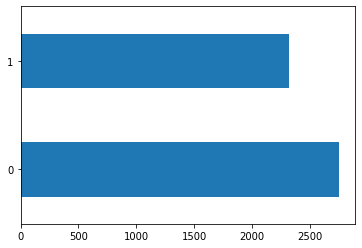

In [5]:
train_df['性别'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='count'>

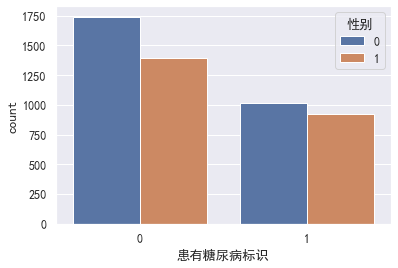

In [6]:
sns.set(font='SimHei',font_scale=1.1)  # 解决Seaborn中文显示问题并调整字体大小
sns.countplot(x='患有糖尿病标识', hue='性别', data=train_df)

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='出生年份'>

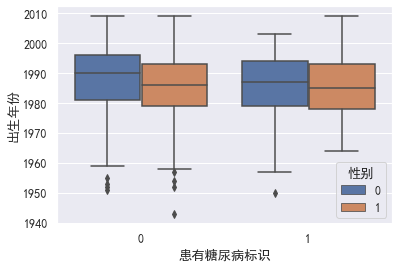

In [7]:
sns.boxplot(y='出生年份', x='患有糖尿病标识', hue='性别', data=train_df)

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='体重指数'>

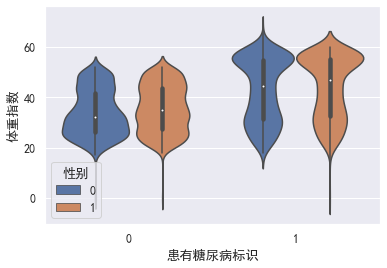

In [8]:
sns.violinplot(y='体重指数', x='患有糖尿病标识', hue='性别', data=train_df)

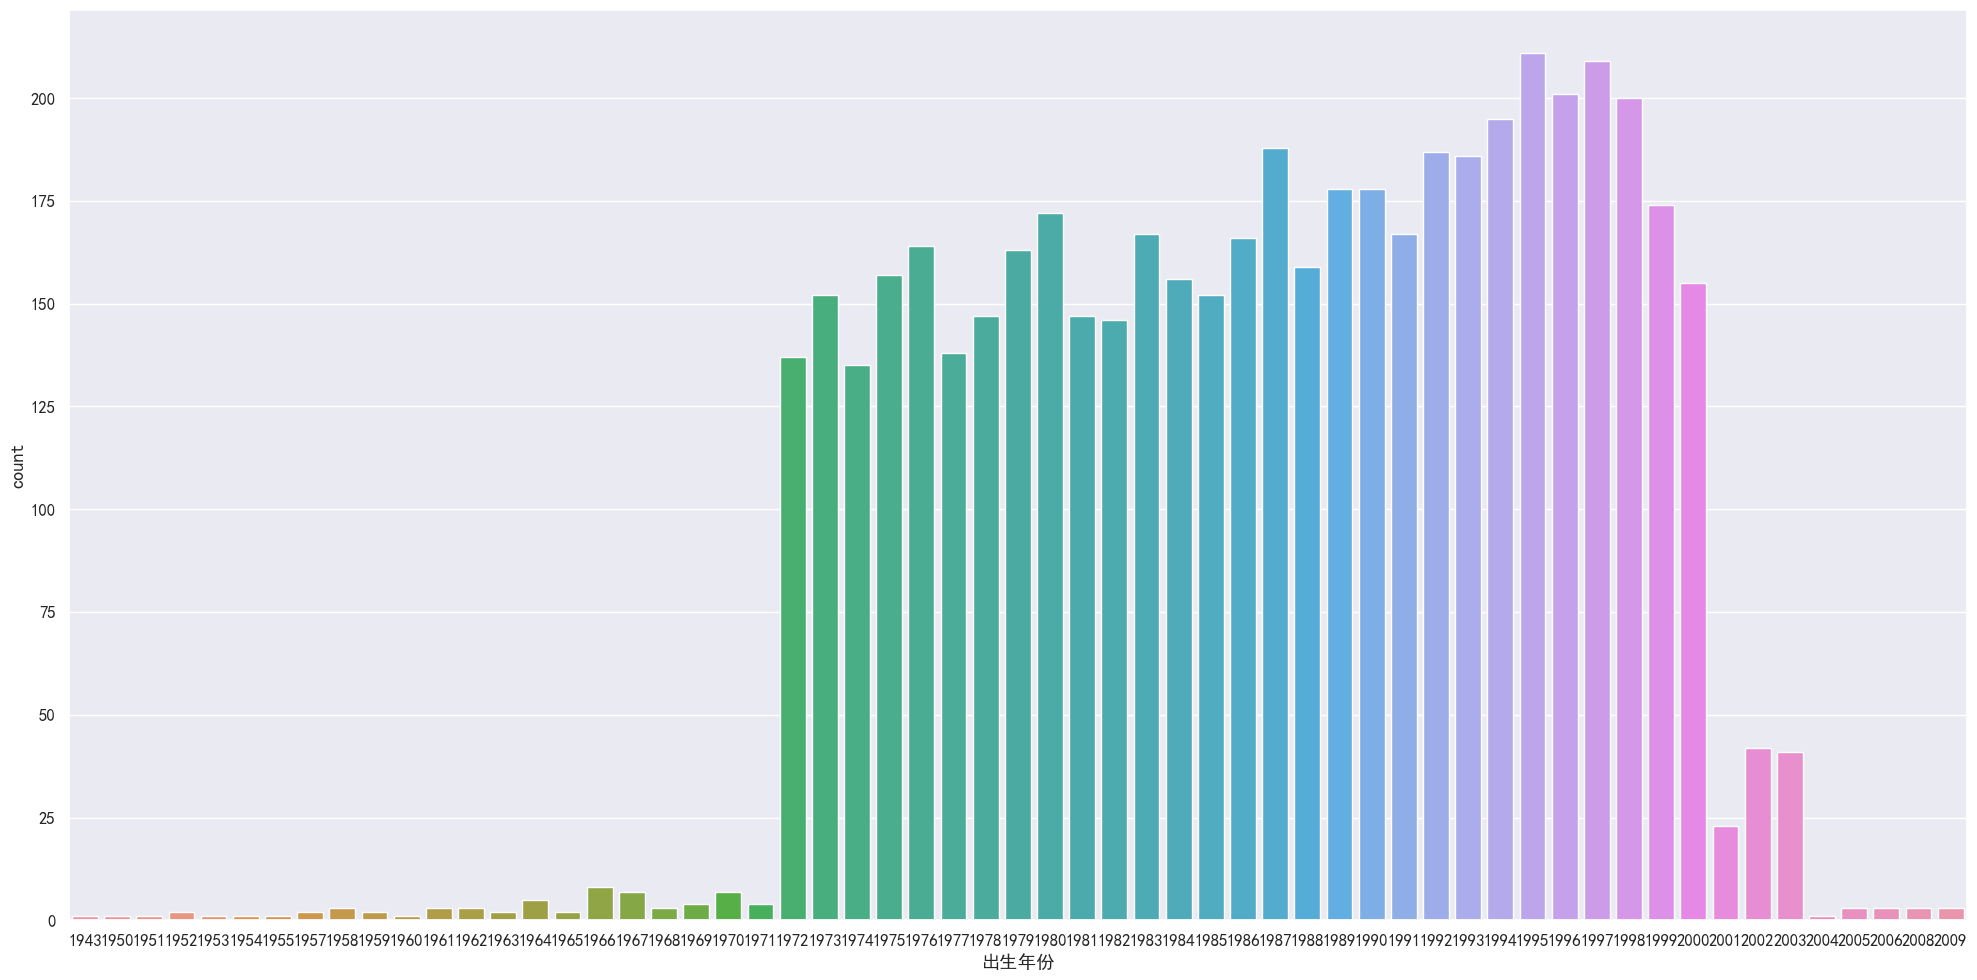

In [9]:
plt.figure(figsize = [20,10],dpi=100)
sns.countplot(x='出生年份',data=train_df)
plt.tight_layout()

# 3.数据的特征工程

In [10]:
train_df['糖尿病家族史'].value_counts()

无记录               2897
叔叔或姑姑有一方患有糖尿病     1084
父母有一方患有糖尿病         875
叔叔或者姑姑有一方患有糖尿病     214
Name: 糖尿病家族史, dtype: int64

In [11]:
#这里将文本数据转成数字数据
dict_糖尿病家族史 = {
    '无记录': 0,
    '叔叔或姑姑有一方患有糖尿病': 1,
    '叔叔或者姑姑有一方患有糖尿病': 1,
    '父母有一方患有糖尿病': 2
}
train_df['糖尿病家族史'] = train_df['糖尿病家族史'].map(dict_糖尿病家族史)
test_df['糖尿病家族史'] = test_df['糖尿病家族史'].map(dict_糖尿病家族史)

In [12]:
#考虑到舒张压是一个较为重要的生理特征，并不能适用于填充平均值，这里采用填充为0的方法
train_df['舒张压'].fillna(0, inplace=True)
test_df['舒张压'].fillna(0, inplace=True)

In [13]:
#将数据中的出生年份换算成年龄
train_df['出生年份'] = 2022 - train_df['出生年份']
test_df['出生年份'] = 2022 - test_df['出生年份']

In [14]:
#将年龄进行一个分类
"""
>50
<=18
19-30
31-50
"""
def resetAge(input):
    if input<=18:
        return 0
    elif 19<=input<=30:
        return 1
    elif 31<=input<=50:
        return 2
    elif input>=51:
        return 3

train_df['rAge']=train_df['出生年份'].apply(resetAge)
test_df['rAge']=test_df['出生年份'].apply(resetAge)

In [15]:
#将体重指数进行一个分类
"""
人体的成人体重指数正常值是在18.5-24之间
低于18.5是体重指数过轻
在24-27之间是体重超重
27以上考虑是肥胖
高于32了就是非常的肥胖。
"""
def BMI(a):
    if a<18.5:
        return 0
    elif 18.5<=a<=24:
        return 1
    elif 24<a<=27:
        return 2
    elif 27<a<=32:
        return 3
    else:
        return 4

train_df['BMI']=train_df['体重指数'].apply(BMI)
test_df['BMI']=test_df['体重指数'].apply(BMI)

In [19]:
def is_number(num):
        s = str(num)
        if s.count('.') == 1:  # 小数
            new_s = s.split('.')
            left_num = new_s[0]
            right_num = new_s[1]
            if right_num.isdigit():
                if left_num.isdigit():
                    return True
                elif left_num.count('-') == 1 and left_num.startswith('-'):  # 负小数
                    tmp_num = left_num.split('-')[-1]
                    if tmp_num.isdigit():
                        return True
        elif s.count(".") == 0:  # 整数
            if s.isdigit():
                return True
            elif s.count('-') == 1 and s.startswith('-'):  # 负整数
                ss = s.split('-')[-1]
                if ss.isdigit():
                    return True
        return False

In [16]:
#将舒张压进行一个分组
"""
舒张压范围为60-90
"""
def DBP(a):
    # if not is_number(a):
    #     return 0
    if a==0:#这里为数据缺失的情况
        return 0
    elif 0<float(a)<60:
        return 1
    elif 60<=float(a)<=90:
        return 2
    else:
        return 3
train_df['DBP']=train_df['舒张压'].apply(DBP)
test_df['DBP']=test_df['舒张压'].apply(DBP)

In [17]:
#删除编号
train_df=train_df.drop(['编号'],axis=1)
test_df=test_df.drop(['编号'],axis=1)

# 4.模型的构建与优化

In [19]:
train_label=train_df['患有糖尿病标识']
train=train_df.drop(['患有糖尿病标识'],axis=1)
test=test_df

# def Filter(a):
#     if not is_number(a):
#         return 0
#     else:
#         return a

# for i in train.columns.tolist():
#     test[i]=test[i].apply(Filter)

# for i in train.columns.tolist():
#     train[i]=train[i].apply(Filter)


## 4.1逻辑回归

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# 构建模型
model = make_pipeline(
    MinMaxScaler(), # 归一化
    LogisticRegression()
)


model.fit(train,train_label)
pre_y=model.predict(test)

result = {'uuid':0,'label':0}
result['uuid']=[i+1 for i in range(len(pre_y))]
result['label']=pre_y
result = pd.DataFrame(result)

# result=pd.read_csv('../data/提交示例.csv')
# result['label']=pre_y
result.to_csv('LR.csv',index=False)

## 4.2决策树

In [27]:
from sklearn.tree import DecisionTreeClassifier

# 构建模型
model = DecisionTreeClassifier()
model.fit(train,train_label)

result = {'uuid':0,'label':0}
result['uuid']=[i+1 for i in range(len(pre_y))]
result['label']=pre_y
result = pd.DataFrame(result)


# pre_y=model.predict(test)
# result=pd.read_csv('../data/提交示例.csv')
# result['label']=pre_y
result.to_csv('CART.csv',index=False)

## 4.3lightgbm

In [21]:
import lightgbm
def select_by_lgb(train_data,train_label,test_data,random_state=2022,metric='auc',num_round=300):
    clf=lightgbm
    train_matrix=clf.Dataset(train_data,label=train_label)

    params={
            'boosting_type': 'gbdt',  
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': metric,
            'seed': 2020,
            'nthread':-1 }
    model=clf.train(params,train_matrix,num_round)
    pre_y=model.predict(test_data)
    return pre_y

#输出预测值   
test_data=select_by_lgb(train,train_label,test)
pre_y=pd.DataFrame(test_data)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)

result = {'uuid':0,'label':0}
result['uuid']=[i+1 for i in range(len(pre_y))]
result = pd.DataFrame(result)
result['label']=pre_y['label']
result.to_csv('lgb.csv',index=False)

[LightGBM] [Info] Number of positive: 1936, number of negative: 3134
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381854 -> initscore=-0.481686
[LightGBM] [Info] Start training from score -0.481686


## 4.4 lightgbm版本5折交叉验证（分数：0.96）：

In [22]:
import lightgbm
from sklearn.model_selection import KFold
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=5,metric='auc',num_round=10000,early_stopping_rounds=100):
    # early_stopping_rounds  在100轮validation score无法改善之后训练将停止。
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        clf=lightgbm
        train_matrix=clf.Dataset(train_x,label=train_y)
        test_matrix=clf.Dataset(test_x,label=test_y)
        params={
                'boosting_type': 'gbdt',  
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': metric,
                'seed': 2020,
                'nthread':-1 }
        model=clf.train(params,train_matrix,num_round,valid_sets=test_matrix,early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
    return result

test_data=select_by_lgb(train,train_label,test)
pre_y=pd.DataFrame(test_data).T
pre_y['averge']=pre_y[[i for i in range(5)]].mean(axis=1)
pre_y['label']=pre_y['averge'].apply(lambda x:1 if x>0.5 else 0)

result = {'uuid':0,'label':0}
result['uuid']=[i+1 for i in range(len(pre_y))]
result = pd.DataFrame(result)
result['label']=pre_y['label']
result.to_csv('lgb-kflod.csv',index=False)

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1547, number of negative: 2509
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381410 -> initscore=-0.483567
[LightGBM] [Info] Start training from score -0.483567
[1]	valid_0's auc: 0.986377
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.989898
[3]	valid_0's auc: 0.989063
[4]	valid_0's auc: 0.990182
[5]	valid_0's auc: 0.990087
[6]	valid_0's auc: 0.990219
[7]	valid_0's auc: 0.990172
[8]	valid_0's auc: 0.990085
[9]	valid_0's auc: 0.990299
[10]	valid_0's auc: 0.989217
[11]	valid_0's auc: 0.989366
[12]	valid_0's auc: 0.98951
[13]	valid_0's auc: 0.989497
[14]	valid_0'

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[116]	valid_0's auc: 0.990546
[117]	valid_0's auc: 0.990571
[118]	valid_0's auc: 0.990624
[119]	valid_0's auc: 0.990633
[120]	valid_0's auc: 0.990661
[121]	valid_0's auc: 0.990633
[122]	valid_0's auc: 0.990637
[123]	valid_0's auc: 0.990674
[124]	valid_0's auc: 0.990719
[125]	valid_0's auc: 0.990653
[126]	valid_0's auc: 0.990678
[127]	valid_0's auc: 0.990694
[128]	valid_0's auc: 0.990653
[129]	valid_0's auc: 0.990624
[130]	valid_0's auc: 0.990633
[131]	valid_0's auc: 0.990562
[132]	valid_0's auc: 0.990591
[133]	valid_0's auc: 0.990554
[134]	valid_0's auc: 0.990562
[135]	valid_0's auc: 0.990521
[136]	valid_0's auc: 0.990517
[137]	valid_0's auc: 0.990468
[138]	valid_0's auc: 0.990484
[139]	valid_0's auc: 0.990414
[140]	valid_0's auc: 0.990464
[141]	valid_0's auc: 0.990455
[142]	valid_0's auc: 0.99041
Early stopping, best iteration is:
[42]	valid_0's auc: 0.991597
[LightGBM] [Info] Number of positive: 1547, number of negative: 2509
[LightGBM] [Warning] Auto-choosing row-wise multi-threadin

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1551, number of negative: 2505
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382396 -> initscore=-0.479389
[LightGBM] [Info] Start training from score -0.479389
[1]	valid_0's auc: 0.98902
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.988935
[3]	valid_0's auc: 0.989466
[4]	valid_0's auc: 0.993213
[5]	valid_0's auc: 0.99325
[6]	valid_0's auc: 0.993341
[7]	valid_0's auc: 0.993416
[8]	valid_0's auc: 0.99342
[9]	valid_0's auc: 0.994085
[10]	valid_0's auc: 0.993963
[11]	valid_0's auc: 0.994149
[12]	valid_0's auc: 0.994188
[13]	valid_0's auc: 0.99452
[14]	valid_0's a

# 5. 模型进阶

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [24]:
train_label=train_df['患有糖尿病标识']
train=train_df.drop(['患有糖尿病标识'],axis=1)
test=test_df

In [25]:
#分割训练集和验证集
train_x,val_x,train_y,val_y=train_test_split(train,train_label,test_size=0.25,random_state=2020)

In [26]:
model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()

In [27]:
for i in model:
    model[i].fit(train_x,train_y)
    score=cross_val_score(model[i],val_x,val_y,cv=5,scoring='f1')
    print('%s的f1为：%.3f'%(i,score.mean()))

rfc的f1为：0.932
gdbt的f1为：0.925
cart的f1为：0.905
knn的f1为：0.811
svm的f1为：0.751
lr的f1为：0.725


d:\Users\96212\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [28]:
from sklearn.model_selection import GridSearchCV

model=['rfc','gbdt','cart']


In [29]:
# n_estimators 最大的弱学习器的个数
temp=[]
rfc=RandomForestClassifier(random_state=0)
params={'n_estimators':[50,100,150,200,250],'max_depth':[1,3,5,7,9,11,13,15,17,19],'min_samples_leaf':[2,4,6]}
temp.append([rfc,params])

gbt=GradientBoostingClassifier(random_state=0)
params={'learning_rate':[0.01,0.05,0.1,0.15,0.2],'n_estimators':[100,300,500],'max_depth':[3,5,7]}
temp.append([gbt,params])

cart=DecisionTreeClassifier(random_state=0)
params={'max_depth':[1,3,5,7,9,11,13,15,17,19],'min_samples_leaf':[2,4,6]}
temp.append([cart,params])

In [30]:
# GridSearchCV 从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。
# GridSearchCV可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，
# 他要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。
for i in range(len(model)):
    best_model=GridSearchCV(temp[i][0],param_grid=temp[i][1],refit=True,cv=5).fit(train,train_label)
    print(model[i],':')
    print('best parameters:',best_model.best_params_)

rfc :
best parameters: {'max_depth': 17, 'min_samples_leaf': 2, 'n_estimators': 100}
gbdt :
best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
cart :
best parameters: {'max_depth': 7, 'min_samples_leaf': 2}


In [31]:
model={}
model['rfc']=RandomForestClassifier(max_depth=17,min_samples_leaf=2,n_estimators=100)
model['gdbt']=GradientBoostingClassifier(learning_rate=0.01,max_depth=7,n_estimators=300)
model['cart']=DecisionTreeClassifier(max_depth=7,min_samples_leaf=2)

In [32]:
for i in model:
    model[i].fit(train_x,train_y)
    score=cross_val_score(model[i],val_x,val_y,cv=5,scoring='f1')
    print('%s的f1为：%.3f'%(i,score.mean()))

rfc的f1为：0.931
gdbt的f1为：0.921
cart的f1为：0.918


In [33]:
model=RandomForestClassifier(max_depth=17,min_samples_leaf=2,n_estimators=100)
model.fit(train,train_label)
pre_y=model.predict(test)

result = {'uuid':0,'label':0}
result['uuid']=[i+1 for i in range(len(pre_y))]
result = pd.DataFrame(result)
result['label']=pre_y
result.to_csv('rfc.csv',index=False)